<a href="https://colab.research.google.com/github/RajaduraiThamizhmani/Data-Analytics-Virtual-Experience-Program-at-Quantium/blob/main/Data_preparation_and_customer_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src ='https://drive.google.com/uc?id=1V9eSK_YrpFpbGmwoT2vEASWcR00LMR3S'>

    By Rajadhurai T
    LinkedIn : https://www.linkedin.com/in/raja-durai-70064014b/

# Task 1-Data preparation and customer analytics
## Conduct analysis on your client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.


In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import io

In [5]:
from google.colab import files
uploaded = files.upload()

Saving QVI_purchase_behaviour.csv to QVI_purchase_behaviour.csv
Saving QVI_transaction_data.xlsx to QVI_transaction_data.xlsx


In [6]:
# Importing required xlsx file
trans = pd.ExcelFile(io.BytesIO(uploaded['QVI_transaction_data.xlsx']))
transcation_data = pd.read_excel(trans,'in')

In [7]:
purchase_data = pd.read_csv('QVI_purchase_behaviour.csv')

In [8]:
purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [9]:
transcation_data.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [10]:
merged_data = pd.merge(purchase_data, transcation_data, on="LYLTY_CARD_NBR", how="right")
print(merged_data.head())

   LYLTY_CARD_NBR               LIFESTAGE  ... PROD_QTY  TOT_SALES
0            1000   YOUNG SINGLES/COUPLES  ...        2        6.0
1            1307  MIDAGE SINGLES/COUPLES  ...        3        6.3
2            1307  MIDAGE SINGLES/COUPLES  ...        2        3.8
3            1307  MIDAGE SINGLES/COUPLES  ...        1        2.1
4            1343  MIDAGE SINGLES/COUPLES  ...        2        2.9

[5 rows x 10 columns]


In [11]:
type(merged_data)

pandas.core.frame.DataFrame

## Exploratory data analysis
The first step in any analysis is to first understand the data. Let's take a look 
at each of the datasets provided.

In [12]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264836 non-null  int64  
 1   LIFESTAGE         264836 non-null  object 
 2   PREMIUM_CUSTOMER  264836 non-null  object 
 3   DATE              264836 non-null  int64  
 4   STORE_NBR         264836 non-null  int64  
 5   TXN_ID            264836 non-null  int64  
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_NAME         264836 non-null  object 
 8   PROD_QTY          264836 non-null  int64  
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


* We can see that the date column is in an integer format. Let's change this to a date format

In [13]:
#Convert DATE column to a datetime format
merged_data['DATE'] = pd.TimedeltaIndex(merged_data['DATE'], unit='d') + dt.datetime(1899, 12, 30)

In [14]:
# Checking the null values
merged_data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
dtype: int64

In [15]:
merged_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1307,MIDAGE SINGLES/COUPLES,Budget,2018-11-10,1,346,96,WW Original Stacked Chips 160g,2,3.8
3,1307,MIDAGE SINGLES/COUPLES,Budget,2019-03-09,1,347,54,CCs Original 175g,1,2.1
4,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9


In [16]:
print(len(merged_data))

264836


In [17]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264836 non-null  int64         
 1   LIFESTAGE         264836 non-null  object        
 2   PREMIUM_CUSTOMER  264836 non-null  object        
 3   DATE              264836 non-null  datetime64[ns]
 4   STORE_NBR         264836 non-null  int64         
 5   TXN_ID            264836 non-null  int64         
 6   PROD_NBR          264836 non-null  int64         
 7   PROD_NAME         264836 non-null  object        
 8   PROD_QTY          264836 non-null  int64         
 9   TOT_SALES         264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 22.2+ MB


We should check that we are looking at the right products by examining PROD_NAME.

Next, checking the prod_name column to make sure all items are chips

In [18]:
transcation_data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [19]:
split_prods = merged_data["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]', ' ').str.split()

In [20]:
## sorting them by this frequency in order of highest to lowest frequency

word_counts = {}

def count_words(line):
    for word in line:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1
            
split_prods.apply(lambda line: count_words(line))

print(pd.Series(word_counts).sort_values(ascending=False))

Chips     49770
Kettle    41288
Smiths    28860
Salt      27976
Cheese    27890
          ...  
Onin       1432
Pc         1431
Garden     1419
NCC        1419
Fries      1418
Length: 198, dtype: int64


* There are salsa products in the dataset but we are only interested in the chips
category, so let's remove these.


In [21]:
merged_data = merged_data[~merged_data["PROD_NAME"].str.contains(r"[Ss]alsa")]

In [22]:
merged_data.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.467420e+05,246742.000000,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,1.355310e+05,135.051098,1.351311e+05,56.351789,1.908062,7.321322
std,8.071528e+04,76.787096,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.700000
25%,7.001500e+04,70.000000,6.756925e+04,26.000000,2.000000,5.800000
50%,1.303670e+05,130.000000,1.351830e+05,53.000000,2.000000,7.400000
75%,2.030840e+05,203.000000,2.026538e+05,87.000000,2.000000,8.800000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,200.000000,650.000000


In [23]:
merged_data["PROD_QTY"].value_counts(bins=4).sort_index()

(0.8, 50.75]       246740
(50.75, 100.5]          0
(100.5, 150.25]         0
(150.25, 200.0]         2
Name: PROD_QTY, dtype: int64

* From the binning above we see that PROD_QTY values above 50.75

In [24]:
merged_data.sort_values(by="PROD_QTY", ascending=False).head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
71457,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
71456,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
171902,23102,RETIREES,Premium,2018-08-19,23,19371,26,Pringles Sweet&Spcy BBQ 134g,5,18.5
151907,118021,RETIREES,Mainstream,2019-05-20,118,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5
17163,57237,MIDAGE SINGLES/COUPLES,Premium,2019-05-16,57,52658,82,Smith Crinkle Cut Mac N Cheese 150g,5,13.0
30491,81299,NEW FAMILIES,Premium,2019-05-15,81,81068,3,Kettle Sensations Camembert & Fig 150g,5,23.0
36616,230068,OLDER FAMILIES,Budget,2019-05-16,230,232345,100,Smiths Crinkle Cut Chips Chs&Onion170g,5,14.5
5177,26185,MIDAGE SINGLES/COUPLES,Mainstream,2019-05-16,26,23086,93,Doritos Corn Chip Southern Chicken 150g,5,19.5
69809,55144,OLDER FAMILIES,Premium,2018-08-18,55,49328,44,Thins Chips Light& Tangy 175g,5,16.5
17200,62135,MIDAGE SINGLES/COUPLES,Premium,2019-05-19,62,58589,79,Smiths Chip Thinly CutSalt/Vinegr175g,5,15.0


* 2 outliers (value = 200) in PROD_QTY will be removed. Both entries are by the same customer, we will examine this customer's other transactions.

In [25]:
print(f'Before {merged_data.info()}')
merged_data = merged_data[merged_data["PROD_QTY"] < 6]
print(f'After {merged_data.info()}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    246742 non-null  int64         
 1   LIFESTAGE         246742 non-null  object        
 2   PREMIUM_CUSTOMER  246742 non-null  object        
 3   DATE              246742 non-null  datetime64[ns]
 4   STORE_NBR         246742 non-null  int64         
 5   TXN_ID            246742 non-null  int64         
 6   PROD_NBR          246742 non-null  int64         
 7   PROD_NAME         246742 non-null  object        
 8   PROD_QTY          246742 non-null  int64         
 9   TOT_SALES         246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.7+ MB
Before None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            N

In [26]:
merged_data["DATE"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  246740
unique                    364
top       2018-12-24 00:00:00
freq                      865
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

* Instead of 365, the DATE column only has 364 unique values. 1 is missing.

* There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's
create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a
chart of number of transactions over time to find the missing date.

In [27]:
pd.date_range(start=merged_data["DATE"].min(), end=merged_data["DATE"].max()).difference(merged_data["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

* Using the difference method we see that 2018-12-25 was the missing date.

In [28]:
check_null_date = pd.merge(pd.Series(pd.date_range(start=merged_data["DATE"].min(), end=merged_data["DATE"].max()), name="DATE"), merged_data, on="DATE", how="left")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


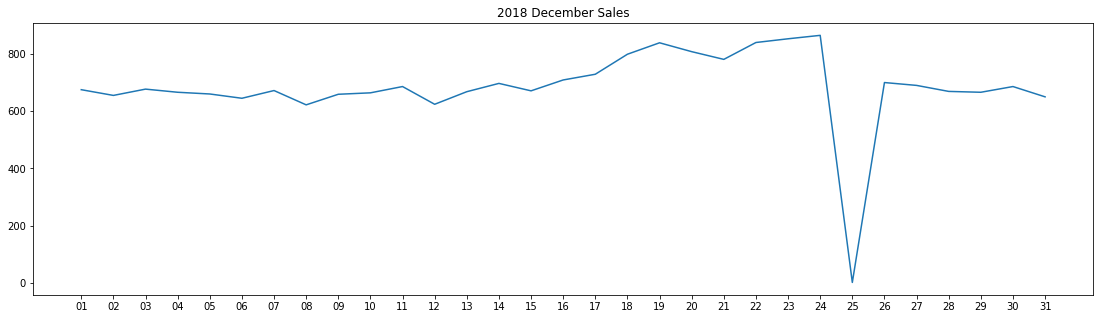

In [29]:
trans_by_date = check_null_date["DATE"].value_counts()
dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()
dec.index = dec.index.strftime('%d')
ax = dec.plot(figsize=(19,5))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)
plt.title("2018 December Sales")
plt.savefig("2018 December Sales.png", bbox_inches="tight")
plt.show()

In [30]:
check_null_date["DATE"].value_counts().sort_values().head()

2018-12-25      1
2019-06-13    607
2018-09-22    609
2018-11-25    610
2018-10-18    611
Name: DATE, dtype: int64


* We can see that the increase in sales occurs in the lead-up to Christmas and that
there are zero sales on Christmas day itself. This is due to shops being closed on
Christmas day.




* Now that we are satisfied that the data no longer has outliers, we can move on to creating other features such as brand of chips or pack size from PROD_NAME. We will start with pack size.


In [31]:
merged_data.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3
2,1307,MIDAGE SINGLES/COUPLES,Budget,2018-11-10,1,346,96,WW Original Stacked Chips 160g,2,3.8
3,1307,MIDAGE SINGLES/COUPLES,Budget,2019-03-09,1,347,54,CCs Original 175g,1,2.1
4,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
5,2373,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
6,2426,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
8,4074,MIDAGE SINGLES/COUPLES,Budget,2018-08-06,4,2978,70,Tyrrells Crisps Lightly Salted 165g,2,8.4
9,4074,MIDAGE SINGLES/COUPLES,Budget,2018-08-09,4,2979,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2
10,4074,MIDAGE SINGLES/COUPLES,Budget,2018-12-12,4,2980,4,Dorito Corn Chp Supreme 380g,2,13.0


In [32]:
merged_data["PROD_NAME"] = merged_data["PROD_NAME"].str.replace(r'[0-9]+(G)','g')

In [33]:
pack_sizes = merged_data["PROD_NAME"].str.extract(r'([0-9]+[gG])')[0].str.replace("g","").astype("float")
print(pack_sizes.describe())

count    240676.000000
mean        175.302286
std          60.014468
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64


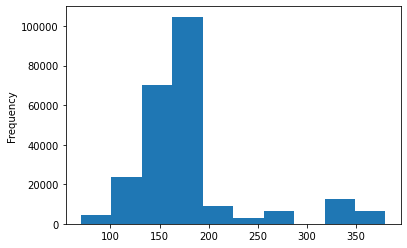

In [34]:
pack_sizes.plot.hist()

* Product pack size looks reasonable with highest transaction frequency in mid-sized pack. Smallest size is 70g, and biggest size is 380g.

**Now to create brands, we can use the first word in PROD_NAME to work out the brand name...**


*  Create a column which contains the brand of the product, by
extracting it from the product name.

In [35]:
merged_data["PROD_NAME"].str.split().str[0].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       22041
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Pringles      25102
RRD           11894
Red            4427
Smith          2963
Smiths        27390
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     1516
Name: PROD_NAME, dtype: int64


* As we look further than the first word in product name, we can see that some product brands are written in more than 1 way. Dorito and Doritos. Grain and GrnWves. Infuzions and Infzns. Natural and NCC. Red and RRD. Smith and Smiths. Snbts and Sunbites. WW and Woolworths.

In [36]:
merged_data["Cleaned_Brand_Names"] = merged_data["PROD_NAME"].str.split().str[0]
def clean_brand_names(line):
    brand = line["Cleaned_Brand_Names"]
    if brand == "Dorito":
        return "Doritos"
    elif brand == "GrnWves" or brand == "Grain":
        return "Grain Waves"
    elif brand == "Infzns":
        return "Infuzions"
    elif brand == "Natural" or brand == "NCC":
        return "Natural Chip Co"
    elif brand == "Red":
        return "RRD"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    else:
        return brand

In [37]:
merged_data["Cleaned_Brand_Names"] = merged_data.apply(lambda line: clean_brand_names(line), axis=1)

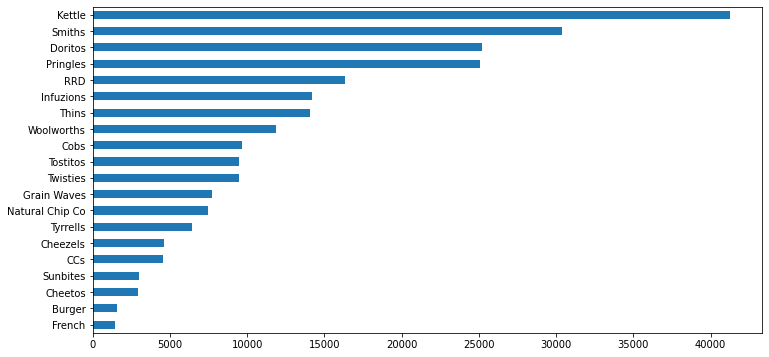

In [38]:
merged_data["Cleaned_Brand_Names"].value_counts(ascending=True).plot.barh(figsize=(12,6))

In [43]:
#you may want to retain this dataset which you can write out as a csv

#from google.colab import files
#merged_data.to_csv('QV_data.csv')
#files.download('QV_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data analysis on customer segments
Now that the data is ready for analysis, we can define some metrics of interest to
the client:
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment


In [44]:
grouped_sales = pd.DataFrame(merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum", "mean"]))
grouped_sales.sort_values(ascending=False, by="sum")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            156863.75  7.291241
YOUNG SINGLES/COUPLES  Mainstream        147582.20  7.551279
RETIREES               Mainstream        145168.95  7.269352
YOUNG FAMILIES         Budget            129717.95  7.302705
OLDER SINGLES/COUPLES  Budget            127833.60  7.444305
                       Mainstream        124648.50  7.306049
                       Premium           123537.55  7.459997
RETIREES               Budget            105916.30  7.445786
OLDER FAMILIES         Mainstream         96413.55  7.281440
RETIREES               Premium            91296.65  7.461315
YOUNG FAMILIES         Mainstream         86338.25  7.226772
MIDAGE SINGLES/COUPLES Mainstream         84734.25  7.637156
YOUNG FAMILIES         Premium            78571.70  7.285951
OLDER FAMILIES         Premium            75242.60  7.232779
YOUNG SINGLES/COUPLES  Budget             57122.10  6.663023
MIDAGE SINGLES/COUPLES Premium            54443.85  7.152371
YOUNG SINGLES/COUPLES  Premium            39052.30  6.673325
MIDAGE SINGLES/COUPLES Budget             33345.70  7.108442
NEW FAMILIES           Budget             20607.45  7.297256
                       Mainstream         15979.70  7.313364
                       Premium            10760.80  7.231720

In [45]:
grouped_sales['sum'].sum()

1805177.6999999979

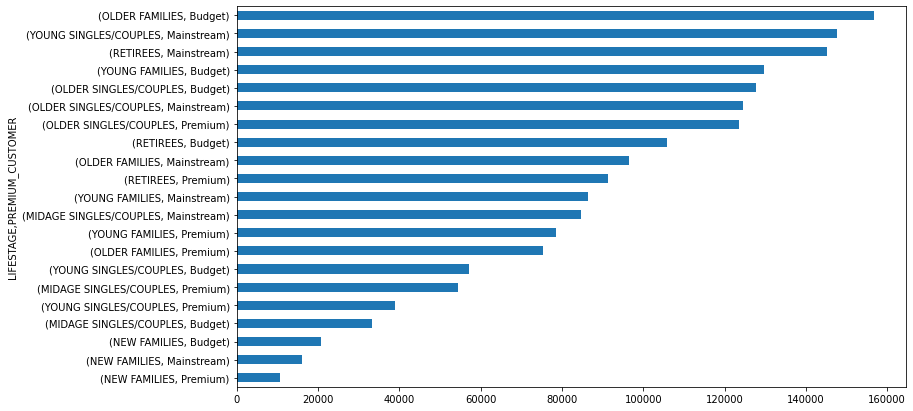

In [46]:
grouped_sales['sum'].sort_values().plot.barh(figsize=(12,7))

In [48]:
stage_agg_prem = merged_data.groupby("LIFESTAGE")["PREMIUM_CUSTOMER"].agg(pd.Series.mode).sort_values()
print("Top contributor per LIFESTAGE by PREMIUM category")
print(stage_agg_prem)

Top contributor per LIFESTAGE by PREMIUM category
LIFESTAGE
NEW FAMILIES                  Budget
OLDER FAMILIES                Budget
OLDER SINGLES/COUPLES         Budget
YOUNG FAMILIES                Budget
MIDAGE SINGLES/COUPLES    Mainstream
RETIREES                  Mainstream
YOUNG SINGLES/COUPLES     Mainstream
Name: PREMIUM_CUSTOMER, dtype: object


**The top 3 total sales contributor segment are (in order):**

* Older families (Budget) \$156,864
* Young Singles/Couples (Mainstream) \$147,582
* Retirees (Mainstream) \$145,169

In [49]:
unique_customer = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().sort_values(ascending=False)
pd.DataFrame(unique_customer)

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream                  7917
RETIREES               Mainstream                  6358
OLDER SINGLES/COUPLES  Mainstream                  4858
                       Budget                      4849
                       Premium                     4682
OLDER FAMILIES         Budget                      4611
RETIREES               Budget                      4385
YOUNG FAMILIES         Budget                      3953
RETIREES               Premium                     3812
YOUNG SINGLES/COUPLES  Budget                      3647
MIDAGE SINGLES/COUPLES Mainstream                  3298
OLDER FAMILIES         Mainstream                  2788
YOUNG FAMILIES         Mainstream                  2685
YOUNG SINGLES/COUPLES  Premium                     2480
YOUNG FAMILIES         Premium                     2398
MIDAGE SINGLES/COUPLES Premium                     2369
OLDER FAMILIES         Premium                     2231
MIDAGE SINGLES/COUPLES Budget                      1474
NEW FAMILIES           Budget                      1087
                       Mainstream                   830
                       Premium                      575

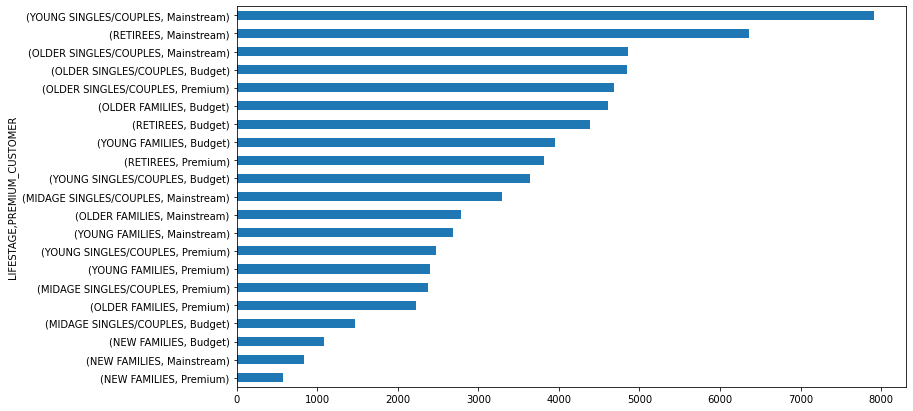

In [51]:
unique_customer.sort_values().plot.barh(figsize=(12,7))

**The high sales amount by segment "Young Singles/Couples - Mainstream" and "Retirees - Mainstream" are due to their large number of unique customers, but not for the "Older - Budget" segment. Next we'll explore if the "Older - Budget" segment has:**

* High Frequency of Purchase and,
* Average Sales per Customer compared to the other segment.

In [52]:
freq_per_cust = merged_data.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"]).count()["DATE"]
freq_per_cust.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(["mean", "count"]).sort_values(ascending=False, by="mean")

mean  count
LIFESTAGE              PREMIUM_CUSTOMER                 
OLDER FAMILIES         Mainstream        4.749283   2788
                       Budget            4.665799   4611
                       Premium           4.662931   2231
YOUNG FAMILIES         Premium           4.497081   2398
                       Budget            4.493549   3953
                       Mainstream        4.449534   2685
OLDER SINGLES/COUPLES  Budget            3.541349   4849
                       Premium           3.536950   4682
                       Mainstream        3.511939   4858
MIDAGE SINGLES/COUPLES Mainstream        3.364160   3298
RETIREES               Budget            3.244014   4385
MIDAGE SINGLES/COUPLES Premium           3.213170   2369
RETIREES               Premium           3.209864   3812
MIDAGE SINGLES/COUPLES Budget            3.182497   1474
RETIREES               Mainstream        3.140925   6358
NEW FAMILIES           Mainstream        2.632530    830
                       Budget            2.597976   1087
                       Premium           2.587826    575
YOUNG SINGLES/COUPLES  Mainstream        2.468612   7917
                       Premium           2.359677   2480
                       Budget            2.350699   3647

**The above table describes the "Average frequency of Purchase per segment" and "Unique customer per segment". The top three most frequent purchase is contributed by the "Older Families" lifestage segment. We can see now that the "Older - Budget" segment contributes to high sales partly because of the combination of:**

* High Frequency of Purchase and,
* Fairly high unique number of customer in the segment

In [53]:
grouped_sales.sort_values(ascending=False, by="mean")

,,sum,mean
LIFESTAGE,PREMIUM_CUSTOMER,,
MIDAGE SINGLES/COUPLES,Mainstream,84734.25,7.637156
YOUNG SINGLES/COUPLES,Mainstream,147582.20,7.551279
RETIREES,Premium,91296.65,7.461315
OLDER SINGLES/COUPLES,Premium,123537.55,7.459997
RETIREES,Budget,105916.30,7.445786
OLDER SINGLES/COUPLES,Budget,127833.60,7.444305
NEW FAMILIES,Mainstream,15979.70,7.313364
OLDER SINGLES/COUPLES,Mainstream,124648.50,7.306049
YOUNG FAMILIES,Budget,129717.95,7.302705



* Highest average spending per purchase are contributed by the Midage and Young "Singles/Couples". 
* The difference between their Mainstream and Non-Mainstream group might seem insignificant (7.6 vs 6.6), 
* but we'll find out by examining if the difference is statistically significant.

In [55]:
mainstream = merged_data["PREMIUM_CUSTOMER"] == "Mainstream"
young_midage = (merged_data["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (merged_data["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")

budget_premium = (merged_data["PREMIUM_CUSTOMER"] == "Budget") | (merged_data["PREMIUM_CUSTOMER"] == "Premium")

a = merged_data[young_midage & mainstream]["TOT_SALES"]
b = merged_data[young_midage & budget_premium]["TOT_SALES"]
stat, pval = ttest_ind(a.values, b.values, equal_var=False)

print(pval)
pval < 0.0000001

1.8346459081757317e-237


True

**P-Value is close to 0. 
There is a statistically significant difference to the Total Sales between the "Mainstream Young Midage" segment to the "Budget and Premium Young Midage" segment.**

##what brand of chips the top 3 segments contributing to Total Sales are buying.

In [56]:
merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["Cleaned_Brand_Names"].agg(pd.Series.mode).sort_values()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              Kettle
YOUNG SINGLES/COUPLES   Budget              Kettle
YOUNG FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
RETIREES                Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
OLDER SINGLES/COUPLES   Premium             Kettle
YOUNG SINGLES/COUPLES   Mainstream          Kettle
OLDER SINGLES/COUPLES   Mainstream          Kettle
OLDER FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
NEW FAMILIES            Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
MIDAGE SINGLES/COUPLES  Premium             Kettle
                        Mainstream       

========== YOUNG SINGLES/COUPLES - Premium ==========
Kettle      838
Smiths      787
Pringles    537
Doritos     489
Name: Cleaned_Brand_Names, dtype: int64


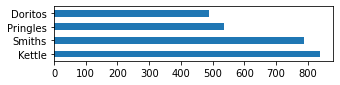

========== YOUNG SINGLES/COUPLES - Budget ==========
Kettle      1211
Smiths      1185
Pringles     832
Doritos      782
Name: Cleaned_Brand_Names, dtype: int64


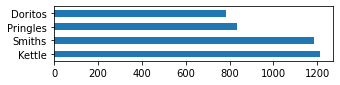

========== YOUNG SINGLES/COUPLES - Mainstream ==========
Kettle      3844
Doritos     2379
Pringles    2315
Smiths      1921
Name: Cleaned_Brand_Names, dtype: int64


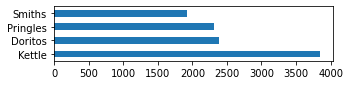

========== MIDAGE SINGLES/COUPLES - Premium ==========
Kettle      1206
Smiths       923
Pringles     781
Doritos      734
Name: Cleaned_Brand_Names, dtype: int64


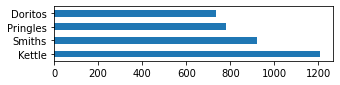

========== MIDAGE SINGLES/COUPLES - Budget ==========
Kettle      713
Smiths      591
Doritos     479
Pringles    449
Name: Cleaned_Brand_Names, dtype: int64


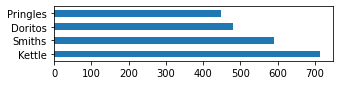

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
Kettle      2136
Smiths      1276
Doritos     1210
Pringles    1159
Name: Cleaned_Brand_Names, dtype: int64


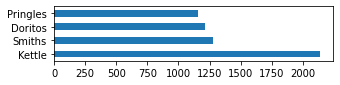

========== NEW FAMILIES - Premium ==========
Kettle      247
Pringles    165
Smiths      155
Doritos     154
Name: Cleaned_Brand_Names, dtype: int64


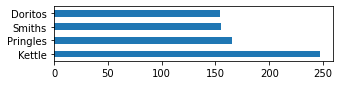

========== NEW FAMILIES - Budget ==========
Kettle      510
Smiths      328
Doritos     315
Pringles    309
Name: Cleaned_Brand_Names, dtype: int64


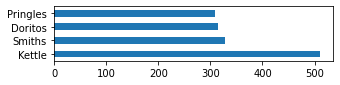

========== NEW FAMILIES - Mainstream ==========
Kettle      414
Doritos     257
Smiths      244
Pringles    224
Name: Cleaned_Brand_Names, dtype: int64


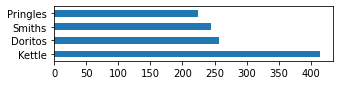

========== OLDER FAMILIES - Premium ==========
Kettle      1512
Smiths      1448
Pringles    1014
Doritos      923
Name: Cleaned_Brand_Names, dtype: int64


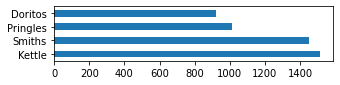

========== OLDER FAMILIES - Budget ==========
Kettle      3320
Smiths      2948
Doritos     2032
Pringles    1996
Name: Cleaned_Brand_Names, dtype: int64


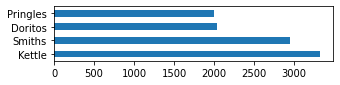

========== OLDER FAMILIES - Mainstream ==========
Kettle      2019
Smiths      1742
Doritos     1263
Pringles    1234
Name: Cleaned_Brand_Names, dtype: int64


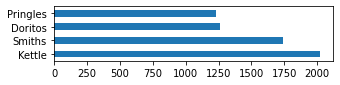

========== OLDER SINGLES/COUPLES - Premium ==========
Kettle      2947
Smiths      1952
Doritos     1784
Pringles    1744
Name: Cleaned_Brand_Names, dtype: int64


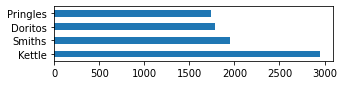

========== OLDER SINGLES/COUPLES - Budget ==========
Kettle      3065
Smiths      2010
Pringles    1843
Doritos     1751
Name: Cleaned_Brand_Names, dtype: int64


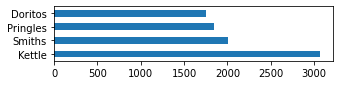

========== OLDER SINGLES/COUPLES - Mainstream ==========
Kettle      2835
Smiths      2070
Doritos     1791
Pringles    1720
Name: Cleaned_Brand_Names, dtype: int64


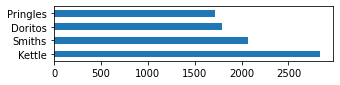

========== RETIREES - Premium ==========
Kettle      2216
Smiths      1395
Pringles    1331
Doritos     1306
Name: Cleaned_Brand_Names, dtype: int64


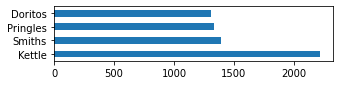

========== RETIREES - Budget ==========
Kettle      2592
Smiths      1612
Doritos     1592
Pringles    1517
Name: Cleaned_Brand_Names, dtype: int64


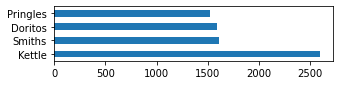

========== RETIREES - Mainstream ==========
Kettle      3386
Smiths      2367
Pringles    2103
Doritos     2089
Name: Cleaned_Brand_Names, dtype: int64


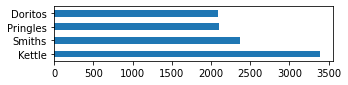

========== YOUNG FAMILIES - Premium ==========
Kettle      1745
Smiths      1384
Pringles    1007
Doritos     1002
Name: Cleaned_Brand_Names, dtype: int64


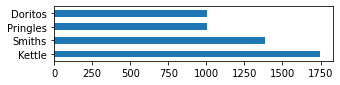

========== YOUNG FAMILIES - Budget ==========
Kettle      2743
Smiths      2334
Doritos     1767
Pringles    1674
Name: Cleaned_Brand_Names, dtype: int64


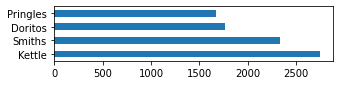

========== YOUNG FAMILIES - Mainstream ==========
Kettle      1789
Smiths      1681
Pringles    1148
Doritos     1125
Name: Cleaned_Brand_Names, dtype: int64


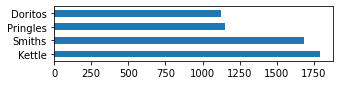

In [57]:

for stage in merged_data["LIFESTAGE"].unique():
    for prem in merged_data["PREMIUM_CUSTOMER"].unique():
        print('==========',stage, '-', prem,'==========')
        summary = merged_data[(merged_data["LIFESTAGE"] == stage) & (merged_data["PREMIUM_CUSTOMER"] == prem)]["Cleaned_Brand_Names"].value_counts().head(4)
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()

* Every segment had Kettle as the most purchased brand. 
* Every segment except "YOUNG SINGLES/COUPLES Mainstream" had Smiths as their second most purchased brand. 
* "YOUNG SINGLES/COUPLES Mainstream" had Doritos as their second most purchased brand

##pack size preferences of different segments

========== YOUNG SINGLES/COUPLES - Premium ==========
134.0     537
150.0     896
175.0    1587
Name: Pack_Size, dtype: int64


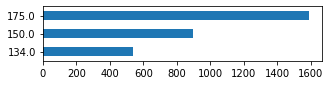

========== YOUNG SINGLES/COUPLES - Budget ==========
134.0     832
150.0    1325
175.0    2262
Name: Pack_Size, dtype: int64


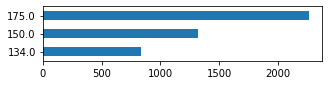

========== YOUNG SINGLES/COUPLES - Mainstream ==========
134.0    2315
150.0    2998
175.0    4928
Name: Pack_Size, dtype: int64


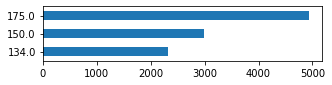

========== MIDAGE SINGLES/COUPLES - Premium ==========
134.0     781
150.0    1163
175.0    2034
Name: Pack_Size, dtype: int64


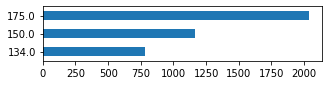

========== MIDAGE SINGLES/COUPLES - Budget ==========
134.0     449
150.0     746
175.0    1256
Name: Pack_Size, dtype: int64


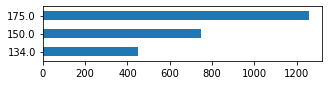

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
134.0    1159
150.0    1714
175.0    2912
Name: Pack_Size, dtype: int64


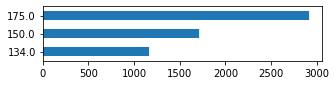

========== NEW FAMILIES - Premium ==========
134.0    165
150.0    225
175.0    371
Name: Pack_Size, dtype: int64


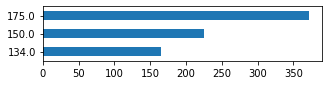

========== NEW FAMILIES - Budget ==========
134.0    309
150.0    425
175.0    763
Name: Pack_Size, dtype: int64


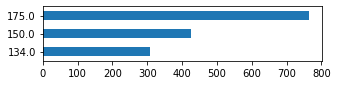

========== NEW FAMILIES - Mainstream ==========
134.0    224
150.0    362
175.0    579
Name: Pack_Size, dtype: int64


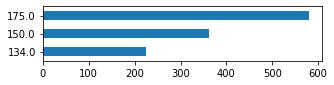

========== OLDER FAMILIES - Premium ==========
134.0    1014
150.0    1607
175.0    2747
Name: Pack_Size, dtype: int64


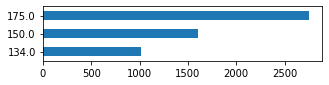

========== OLDER FAMILIES - Budget ==========
134.0    1996
150.0    3414
175.0    5662
Name: Pack_Size, dtype: int64


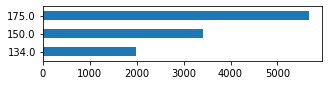

========== OLDER FAMILIES - Mainstream ==========
134.0    1234
150.0    2091
175.0    3489
Name: Pack_Size, dtype: int64


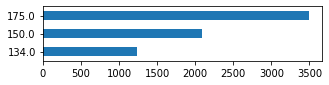

========== OLDER SINGLES/COUPLES - Premium ==========
134.0    1744
150.0    2672
175.0    4382
Name: Pack_Size, dtype: int64


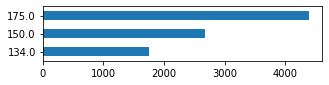

========== OLDER SINGLES/COUPLES - Budget ==========
134.0    1843
150.0    2726
175.0    4535
Name: Pack_Size, dtype: int64


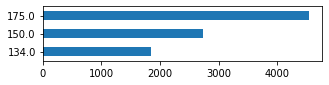

========== OLDER SINGLES/COUPLES - Mainstream ==========
134.0    1720
150.0    2660
175.0    4422
Name: Pack_Size, dtype: int64


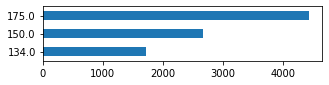

========== RETIREES - Premium ==========
134.0    1331
150.0    1883
175.0    3232
Name: Pack_Size, dtype: int64


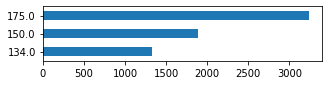

========== RETIREES - Budget ==========
134.0    1517
150.0    2242
175.0    3768
Name: Pack_Size, dtype: int64


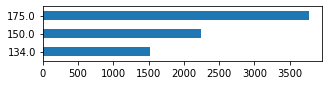

========== RETIREES - Mainstream ==========
134.0    2103
150.0    3183
175.0    5187
Name: Pack_Size, dtype: int64


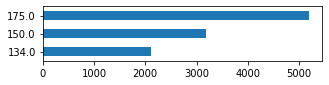

========== YOUNG FAMILIES - Premium ==========
134.0    1007
150.0    1697
175.0    2926
Name: Pack_Size, dtype: int64


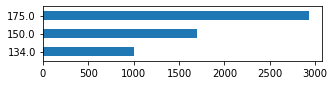

========== YOUNG FAMILIES - Budget ==========
134.0    1674
150.0    2749
175.0    4800
Name: Pack_Size, dtype: int64


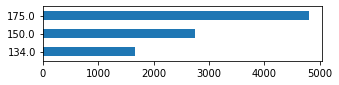

========== YOUNG FAMILIES - Mainstream ==========
134.0    1148
150.0    1927
175.0    3087
Name: Pack_Size, dtype: int64


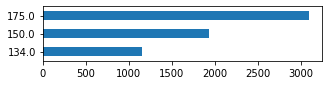

In [58]:

merged_pack = pd.concat([merged_data, pack_sizes.rename("Pack_Size")], axis=1)

for stage in merged_data["LIFESTAGE"].unique():
    for prem in merged_data["PREMIUM_CUSTOMER"].unique():
        print('==========',stage, '-', prem,'==========')
        summary = merged_pack[(merged_pack["LIFESTAGE"] == stage) & (merged_pack["PREMIUM_CUSTOMER"] == prem)]["Pack_Size"].value_counts().head(3).sort_index()
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()

**All of the segments prefer the 175gr pack size chips, followed by the 150gr size.**

##average amount of chips bought per customer segment.

In [62]:
temp = merged_data.reset_index().rename(columns = {"index": "transaction"})
temp["Segment"] = temp["LIFESTAGE"] + ' - ' + temp['PREMIUM_CUSTOMER']

In [63]:
(temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).sort_values(ascending=False)

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Mainstream          9.255380
                        Budget              9.076773
                        Premium             9.071717
YOUNG FAMILIES          Budget              8.722995
                        Premium             8.716013
                        Mainstream          8.638361
OLDER SINGLES/COUPLES   Budget              6.781398
                        Premium             6.769543
                        Mainstream          6.712021
MIDAGE SINGLES/COUPLES  Mainstream          6.432080
RETIREES                Budget              6.141847
                        Premium             6.103358
MIDAGE SINGLES/COUPLES  Premium             6.078514
                        Budget              6.026459
RETIREES                Mainstream          5.925920
NEW FAMILIES            Mainstream          4.891566
                        Budget              4.821527
                        Premium             4.815652
YOUNG

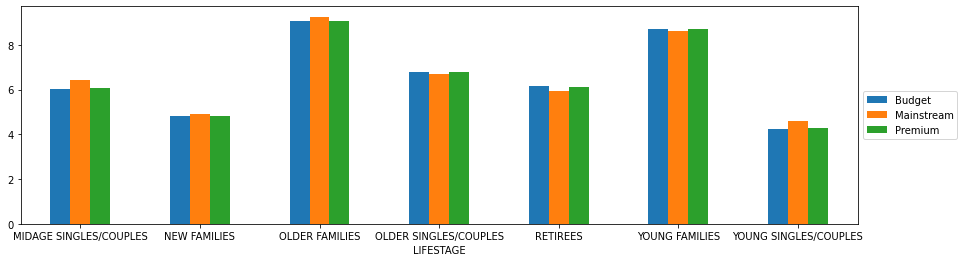

In [64]:
(temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["PROD_QTY"].sum() / temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique()).unstack().plot.bar(figsize=(15,4), rot=0)
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.savefig("Average purchase quantity per segment.png", bbox_inches="tight")

In [65]:
#Average chips price per transaction by segments
temp["Unit_Price"] = temp["TOT_SALES"] / temp["PROD_QTY"]
temp.groupby(["Segment"]).mean()["Unit_Price"].sort_values(ascending=False)

Segment
YOUNG SINGLES/COUPLES - Mainstream     4.065642
MIDAGE SINGLES/COUPLES - Mainstream    3.994241
RETIREES - Budget                      3.924404
RETIREES - Premium                     3.920942
NEW FAMILIES - Budget                  3.917688
NEW FAMILIES - Mainstream              3.916133
OLDER SINGLES/COUPLES - Premium        3.893182
OLDER SINGLES/COUPLES - Budget         3.882096
NEW FAMILIES - Premium                 3.872110
RETIREES - Mainstream                  3.844294
OLDER SINGLES/COUPLES - Mainstream     3.814665
MIDAGE SINGLES/COUPLES - Premium       3.770698
YOUNG FAMILIES - Premium               3.762150
YOUNG FAMILIES - Budget                3.760737
OLDER FAMILIES - Budget                3.745340
MIDAGE SINGLES/COUPLES - Budget        3.743328
OLDER FAMILIES - Mainstream            3.737077
YOUNG FAMILIES - Mainstream            3.724533
OLDER FAMILIES - Premium               3.717000
YOUNG SINGLES/COUPLES - Premium        3.665414
YOUNG SINGLES/COUPLES - Budget  

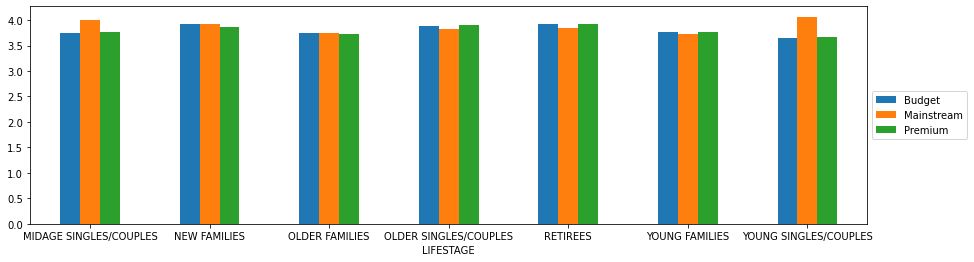

In [66]:
temp.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).mean()["Unit_Price"].unstack().plot.bar(figsize=(15,4), rot=0)
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))

In [67]:
z = temp.groupby(["Segment", "Cleaned_Brand_Names"]).sum()["TOT_SALES"].sort_values(ascending=False).reset_index()
z[z["Segment"] == "YOUNG SINGLES/COUPLES - Mainstream"]

,Segment,Cleaned_Brand_Names,TOT_SALES
0,YOUNG SINGLES/COUPLES - Mainstream,Kettle,35423.6
8,YOUNG SINGLES/COUPLES - Mainstream,Doritos,20925.9
22,YOUNG SINGLES/COUPLES - Mainstream,Pringles,16006.2
24,YOUNG SINGLES/COUPLES - Mainstream,Smiths,14958.9
54,YOUNG SINGLES/COUPLES - Mainstream,Infuzions,8749.4
61,YOUNG SINGLES/COUPLES - Mainstream,Twisties,7539.8
69,YOUNG SINGLES/COUPLES - Mainstream,Tostitos,7238.0
70,YOUNG SINGLES/COUPLES - Mainstream,Thins,7217.1
84,YOUNG SINGLES/COUPLES - Mainstream,Cobs,6144.6
115,YOUNG SINGLES/COUPLES - Mainstream,Tyrrells,4800.6


#Insights:
Top 3 total sales contributor segment are

    * Older families (Budget) \$156,864
    * Young Singles/Couples (Mainstream) \$147,582
    * Retirees (Mainstream) \$145,169
* Young Singles/Couples (Mainstream) has the highest population, followed by Retirees (Mainstream). Which explains their high total sales.

* Despite Older Families not having the highest population, they have the highest frequency of purchase, which contributes to their high total sales.
* Older Families followed by Young Families has the highest average quantity of chips bought per purchase.
* The Mainstream category of the "Young and Midage Singles/Couples" have the highest spending of chips per purchase. And the difference to the non-Mainstream "Young and Midage Singles/Couples" are statistically significant.
* Chips brand Kettle is dominating every segment as the most purchased brand.
Observing the 2nd most purchased brand, "Young and Midage Singles/Couples" is the only segment with a different preference (Doritos) as compared to others' (Smiths).
* Most frequent chip size purchased is 175gr followed by the 150gr chip size for all segments.

#Reccomendations:

* Older Families:
    * Focus on the Budget segment.

    * Strength: Frequent purchase. We can give promotions that encourages more frequency of purchase.

    * Strength: High quantity of chips purchased per visit. We can give promotions that encourage them to buy more quantity of chips per purchase.
* Young Singles/Couples:
    * Focus on the Mainstream segment.
    * This segment is the only segment that had Doritos as their 2nd most purchased brand (after Kettle). To specifically target this segment it might be a good idea to collaborate with Doritos merchant to do some branding promotion catered to "Young Singles/Couples - Mainstream" segment.
    * Strength: Population quantity. We can spend more effort on making sure our promotions reach them, and it reaches them frequently.
* Retirees:
    * Focus on the Mainstream segment.
    * Strength: Population quantity. Again, since their population quantity is the contributor to the high total sales, we should spend more effort on making sure our promotions reaches as many of them as possible and frequent.
* General:
    * All segments has Kettle as the most frequently purchased brand, and 175gr (regardless of brand) followed by 150gr as the preferred chip size.
    * When promoting chips in general to all segments it is good to take advantage of these two points.
